# LGBTQ+ Data

In [38]:
import numpy as np
import pandas as pd

In [39]:
# filtering columns and rows to isolate London boroughs.
# columns are filtered by percentage, not by raw number of populations. 
lgbtq_p = pd.read_excel('lgbtqdata.xlsx', usecols = [0, 1, 10, 11 , 12, 13, 14, 15, 16, 17],
                       header = 1, skiprows = ([i for i in range(1, 4)] + [j for j in range(5, 282)] + [k for k in range (314, 336)])) 

# renaming 'Area name' to 'Borough'
lgbtq_p.rename(columns={'Area name': 'Borough'}, inplace=True)


In [60]:
# testing
lgbtq_p.head(15)

,Area code,Borough,Straight or Heterosexual\n(percent),Gay or Lesbian\n(percent),Bisexual\n(percent),Pansexual\n(percent),Asexual\n(percent),Queer\n(percent),All other sexual orientations\n(percent),Not answered\n(percent),LGBTQ+\n(percent),Subregion
0,E09000002,Barking and Dagenham,0.783290,0.82,0.97,0.38,0.03,0.01,0.07,9.14,0.168498,East
1,E09000003,Barnet,0.669278,1.25,1.06,0.36,0.05,0.03,0.04,9.94,0.197802,North
2,E09000004,Bexley,0.986945,1.05,0.81,0.18,0.03,0.02,0.02,6.97,0.021978,East
3,E09000005,Brent,0.480418,1.31,1.29,0.45,0.04,0.03,0.07,11.70,0.322344,West
4,E09000006,Bromley,0.905135,1.53,0.95,0.16,0.05,0.03,0.02,7.30,0.076923,South
5,E09000007,Camden,0.258486,3.74,2.54,0.42,0.11,0.09,0.05,10.51,0.809524,Central
6,E09000008,Croydon,0.715405,1.51,1.18,0.28,0.04,0.03,0.03,9.13,0.205128,South
7,E09000009,Ealing,0.585727,1.52,1.30,0.41,0.05,0.03,0.04,10.35,0.304029,West
8,E09000010,Enfield,0.745866,0.91,0.81,0.37,0.03,0.01,0.06,9.67,0.102564,North
9,E09000011,Greenwich,0.641427,2.47,1.47,0.37,0.05,0.10,0.03,8.56,0.373626,East


In [41]:
# looks good
lgbtq_p.tail(5)

,Area code,Borough,Straight or Heterosexual\n(percent),Gay or Lesbian\n(percent),Bisexual\n(percent),Pansexual\n(percent),Asexual\n(percent),Queer\n(percent),All other sexual orientations\n(percent),Not answered\n(percent)
27,E09000029,Sutton,89.95,1.17,0.97,0.19,0.04,0.01,0.01,7.65
28,E09000030,Tower Hamlets,83.07,3.96,2.52,0.46,0.06,0.13,0.04,9.76
29,E09000031,Waltham Forest,85.99,2.26,1.62,0.44,0.05,0.09,0.05,9.49
30,E09000032,Wandsworth,86.47,3.05,1.74,0.26,0.06,0.05,0.03,8.34
31,E09000033,Westminster,83.31,3.47,1.54,0.33,0.06,0.05,0.04,11.20


## Analyzing LGBTQ+ Data

In [42]:
import os
import re
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from kneed import knee_locator
from scipy import stats

# listing data types to see if anything needs to be changed.
df_types = lgbtq_p.dtypes
print(df_types)

Area code                                    object
Borough                                      object
Straight or Heterosexual\n(percent)         float64
Gay or Lesbian\n(percent)                   float64
Bisexual\n(percent)                         float64
Pansexual\n(percent)                        float64
Asexual\n(percent)                          float64
Queer\n(percent)                            float64
All other sexual orientations\n(percent)    float64
Not answered\n(percent)                     float64
dtype: object


In [43]:
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.cluster import KMeans, DBSCAN, OPTICS

In [44]:
### UMAP Analysis

In [45]:
from umap import UMAP

keep_dims=2
rs=42

u = UMAP(
    n_neighbors=25,
    min_dist=0.01,
    n_components=keep_dims,
    random_state=rs)

<AxesSubplot:xlabel='Straight or Heterosexual\n(percent)', ylabel='Gay or Lesbian\n(percent)'>

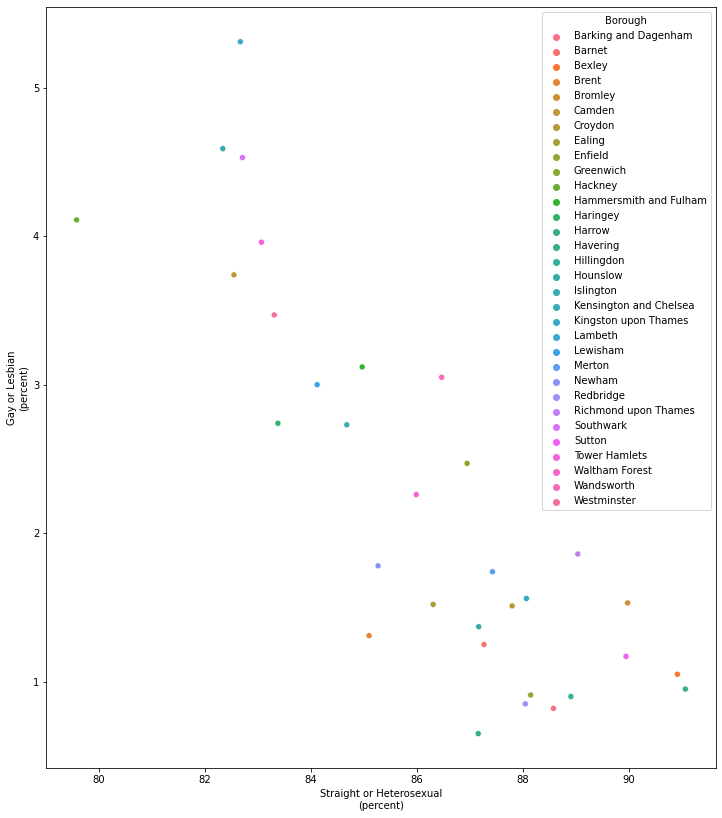

In [46]:
f,ax = plt.subplots(1,1,figsize=(12,14))
sns.scatterplot(x=lgbtq_p['Straight or Heterosexual\n(percent)'], y=lgbtq_p['Gay or Lesbian\n(percent)'], hue=lgbtq_p['Borough'], legend=True, ax=ax)

In [47]:
lgbtq_p['LGBTQ+\n(percent)'] = lgbtq_p['Bisexual\n(percent)'] + lgbtq_p['Pansexual\n(percent)'] + lgbtq_p['Asexual\n(percent)'] + lgbtq_p['Queer\n(percent)'] + lgbtq_p['All other sexual orientations\n(percent)']

<AxesSubplot:xlabel='Straight or Heterosexual\n(percent)', ylabel='LGBTQ+\n(percent)'>

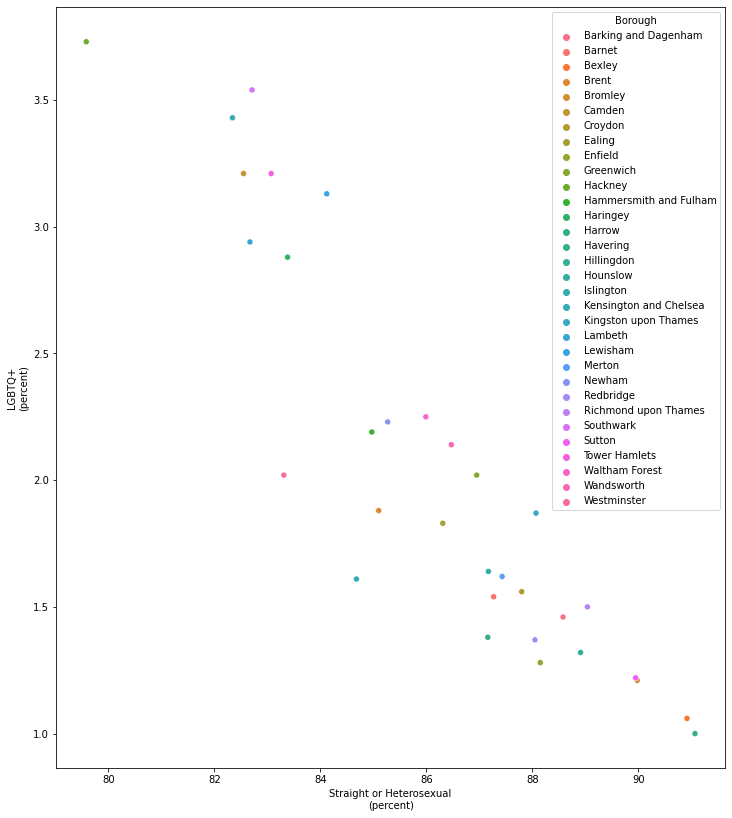

In [48]:
f,ax = plt.subplots(1,1,figsize=(12,14))
sns.scatterplot(x=lgbtq_p['Straight or Heterosexual\n(percent)'], y=lgbtq_p['LGBTQ+\n(percent)'], hue=lgbtq_p['Borough'], legend=True, ax=ax)

In [49]:
mapping = {}
for b in ['Barnet', 'Enfield', 'Haringey']:
    mapping[b]='North'
for b in ['Brent', 'Ealing', 'Hammersmith and Fulham',
          'Harrow', 'Hillingdon', 'Hounslow', 'Richmond upon Thames']:
    mapping[b]='West'
for b in ['Camden', 'Islington','Kensington and Chelsea', 'Lambeth', 'Southwark', 'Westminster']:
    mapping[b]='Central'
for b in ['Bromley','Croydon','Kingston upon Thames', 'Merton', 'Sutton', 'Wandsworth']:
    mapping[b]='South'
for b in ['Barking and Dagenham', 'Bexley', 'Greenwich', 'Hackney', 'Havering', 'Lewisham', 'Newham', 
          'Redbridge', 'Tower Hamlets', 'Waltham Forest']:
    mapping[b]='East'

lgbtq_p['Subregion'] = lgbtq_p.Borough.apply(lambda x: mapping[x])

In [50]:
# Keywords
kwds = dict(s=10,alpha=0.95,edgecolor="none")

# Color palette 
sns.set_palette(sns.color_palette("inferno"))

#Subregion hues
sr_hue = ['North', 'West', 'Central', 'South', 'East']

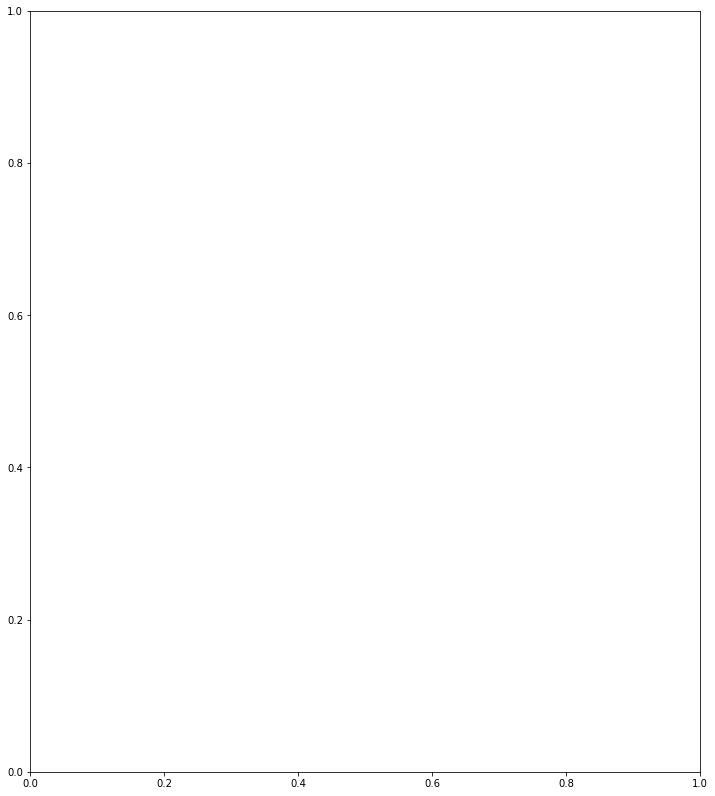

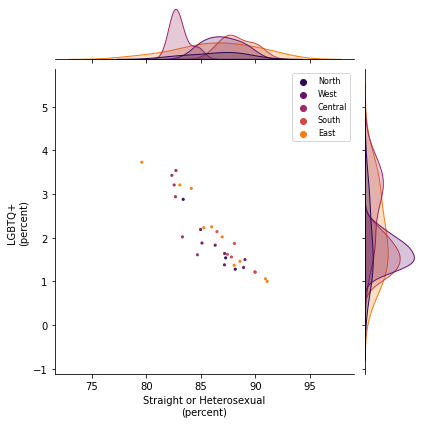

In [51]:
g,ax = plt.subplots(1,1,figsize=(12,14))
g = sns.jointplot(data=lgbtq_p, x='Straight or Heterosexual\n(percent)', y='LGBTQ+\n(percent)', height=6, 
                  hue='Subregion', hue_order=sr_hue, joint_kws=kwds, ax=ax)
g.ax_joint.legend(loc='upper right', prop={'size': 8});

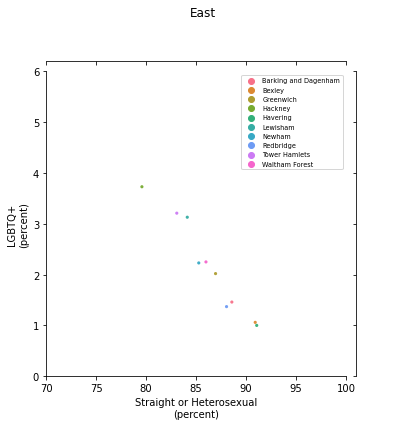

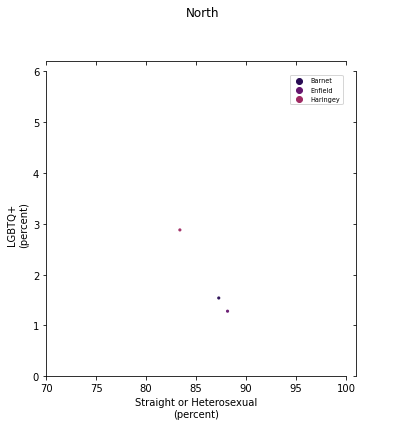

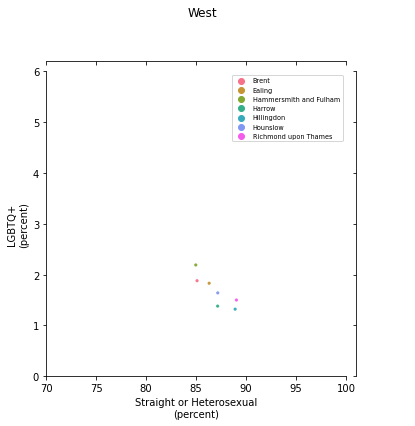

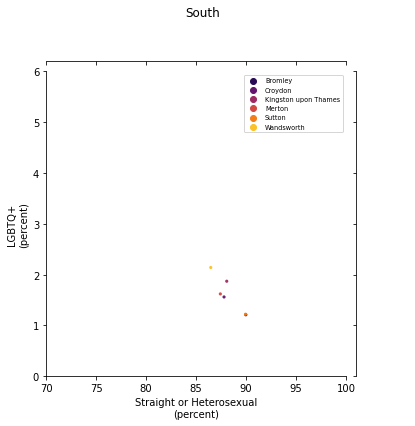

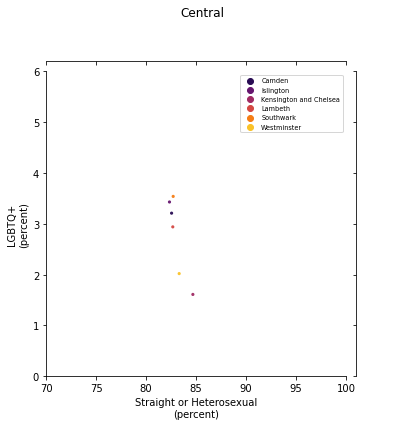

In [52]:
for l in lgbtq_p.Subregion.unique():
    g = sns.jointplot(data=lgbtq_p[lgbtq_p.Subregion==l], x='Straight or Heterosexual\n(percent)', 
                      y='LGBTQ+\n(percent)', hue='Borough', joint_kws=kwds)
    g.ax_joint.legend(loc='upper right', prop={'size': 6.5});
    g.ax_joint.set_ylim(0,6)
    g.ax_joint.set_xlim(70,100)
    plt.suptitle(l)

In [53]:
from numpy import asarray

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
# LGBTQ+ MinMax scaler and data
scaler_l = MinMaxScaler()
lgbtq_p[['Straight or Heterosexual\n(percent)','LGBTQ+\n(percent)']] = scaler_l.fit_transform(lgbtq_p[['Straight or Heterosexual\n(percent)','LGBTQ+\n(percent)']])

In [56]:
print(lgbtq_p[['Straight or Heterosexual\n(percent)','LGBTQ+\n(percent)']])

    Straight or Heterosexual\n(percent)  LGBTQ+\n(percent)
0                              0.783290           0.168498
1                              0.669278           0.197802
2                              0.986945           0.021978
3                              0.480418           0.322344
4                              0.905135           0.076923
5                              0.258486           0.809524
6                              0.715405           0.205128
7                              0.585727           0.304029
8                              0.745866           0.102564
9                              0.641427           0.373626
10                             0.000000           1.000000
11                             0.469104           0.435897
12                             0.330722           0.688645
13                             0.659704           0.139194
14                             1.000000           0.000000
15                             0.812010           0.1172

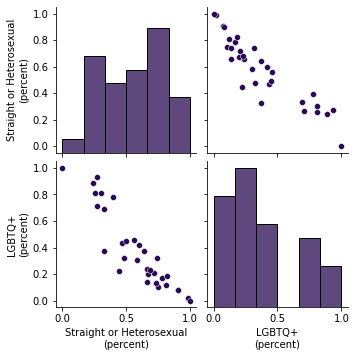

In [57]:
sns.pairplot(lgbtq_p[['Straight or Heterosexual\n(percent)','LGBTQ+\n(percent)']])

In [61]:
lgbtq_p.describe().round(2)

,Straight or Heterosexual\n(percent),Gay or Lesbian\n(percent),Bisexual\n(percent),Pansexual\n(percent),Asexual\n(percent),Queer\n(percent),All other sexual orientations\n(percent),Not answered\n(percent),LGBTQ+\n(percent)
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,0.58,2.24,1.52,0.36,0.05,0.06,0.04,9.50,0.38
std,0.25,1.30,0.63,0.12,0.02,0.06,0.02,1.35,0.29
min,0.00,0.65,0.73,0.16,0.03,0.01,0.01,6.97,0.00
25%,0.38,1.23,0.97,0.28,0.04,0.02,0.03,8.79,0.16
50%,0.62,1.76,1.30,0.37,0.05,0.04,0.04,9.66,0.31
75%,0.74,3.07,1.84,0.44,0.06,0.09,0.06,10.39,0.52
max,1.00,5.31,2.83,0.67,0.11,0.24,0.07,12.60,1.00


In [62]:
lgbtq_p.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Area code                                32 non-null     object 
 1   Borough                                  32 non-null     object 
 2   Straight or Heterosexual
(percent)       32 non-null     float64
 3   Gay or Lesbian
(percent)                 32 non-null     float64
 4   Bisexual
(percent)                       32 non-null     float64
 5   Pansexual
(percent)                      32 non-null     float64
 6   Asexual
(percent)                        32 non-null     float64
 7   Queer
(percent)                          32 non-null     float64
 8   All other sexual orientations
(percent)  32 non-null     float64
 9   Not answered
(percent)                   32 non-null     float64
 10  LGBTQ+
(percent)                         32 non-null